In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dados = pd.read_csv('../data/planet.states',  header = None, engine='python', delim_whitespace=True, names=["satID" ,"epochSince", "posX", "posY", "posZ", "velX", "velY", "velZ", "drag","srp"])  
print(dados.head())


  satID    epochSince          posX          posY          posZ         velX  \
0  0505  7.122897e+08  3.292356e+06 -3.505646e+06 -4.959425e+06   386.832393   
1  0711  7.122897e+08 -1.806753e+05  2.167599e+06  6.818067e+06  3872.929312   
2  0903  7.122897e+08  3.624594e+05 -1.203934e+06 -6.852077e+06 -6971.885542   
3  0904  7.122897e+08 -1.089835e+06 -5.876037e+05 -6.855671e+06 -6852.287462   
4  0905  7.122897e+08  5.778816e+06 -2.864949e+06 -2.632872e+06 -3042.006519   

          velY         velZ       drag  srp  
0  6327.588174 -4188.074099  41.445888  inf  
1 -5991.360419  1996.190877  17.828084  inf  
2  2787.816692  -857.084453  17.385902  inf  
3  3079.854100   825.001389  17.587968  inf  
4   230.741022 -6922.598822  12.291986  inf  


In [2]:
#has no nan values
dados.isnull().values.any()

#todos os dados sao de satelites diferentes
dados.satID.value_counts().sort_index()


0505    1
0711    1
0903    1
0904    1
0905    1
       ..
s118    1
s119    1
s2      1
s3      1
s4      1
Name: satID, Length: 338, dtype: int64

Verificacão de outliers

In [3]:
#Para a epochSince, parecem haver 3 outliers (1 acima do valor maximo e 2 abaixo do valor minimo)
# plt.boxplot(dados.epochSince, notch=None, vert=None, patch_artist=None, widths=None)
plt.show()

#Para a posX, parecem haver muitos outliers acima e abaixo
# plt.boxplot(dados.posX, notch=None, vert=None, patch_artist=None, widths=None)
plt.show()

#Para a posY, nao ha outliers
# plt.boxplot(dados.posY, notch=None, vert=None, patch_artist=None, widths=None)
plt.show()

#Para a posZ, nao ha outliers
# plt.boxplot(dados.posZ, notch=None, vert=None, patch_artist=None, widths=None)
plt.show()

#Para a velX, ha muitos outliers acima e abaixo
# plt.boxplot(dados.velX, notch=None, vert=None, patch_artist=None, widths=None)
plt.show()

#Para a velY, nao ha outliers
# plt.boxplot(dados.velY, notch=None, vert=None, patch_artist=None, widths=None)
plt.show()

#Para a velZ, nao ha outliers
# plt.boxplot(dados.velZ, notch=None, vert=None, patch_artist=None, widths=None)
plt.show()

#Para o drag, ha muitos outliers apenas acima
# plt.boxplot(dados.drag, notch=None, vert=None, patch_artist=None, widths=None)
plt.show()

dados.describe()

c:\Users\jpfun\Desktop\Gitlab Neuraspace\joao-funenga\venv\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


epochSince          posX          posY          posZ         velX  \
count  3.380000e+02  3.380000e+02  3.380000e+02  3.380000e+02   338.000000   
mean   7.122897e+08  4.845410e+04 -3.845441e+05 -3.489285e+05   -75.145958   
std    6.399121e+00  1.460854e+06  4.542397e+06  4.907230e+06  1866.933650   
min    7.122897e+08 -5.607862e+06 -6.893248e+06 -6.855671e+06 -6971.885542   
25%    7.122897e+08 -7.783343e+05 -4.466900e+06 -5.306951e+06  -953.917534   
50%    7.122897e+08  5.217947e+04 -8.811934e+05 -6.841072e+05   -47.606747   
75%    7.122897e+08  8.415251e+05  4.040874e+06  4.690952e+06   917.693687   
max    7.122898e+08  5.967451e+06  6.878584e+06  6.850335e+06  7068.440187   

              velY         velZ        drag    srp  
count   338.000000   338.000000  338.000000  338.0  
mean     23.653909   281.736020   32.579581    inf  
std    5269.131178  5191.360428   18.803896    NaN  
min   -7578.805256 -7592.624068   12.121986    inf  
25%   -5675.197445 -4781.993335   21.517144    NaN  
50%     227.171805   788.407592   25.076256    NaN  
75%    5115.325607  5071.316979   35.655813    NaN  
max    7607.140573  7601.254637  105.027415    inf

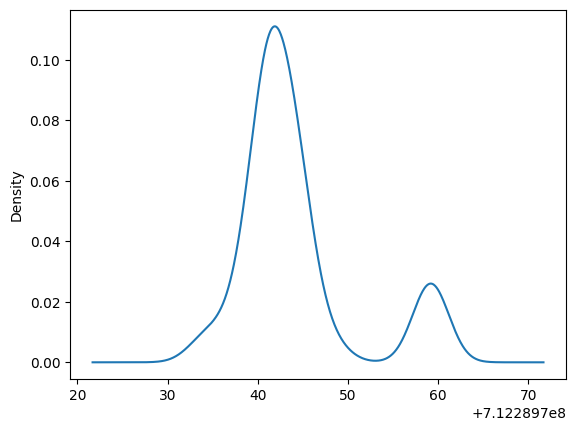

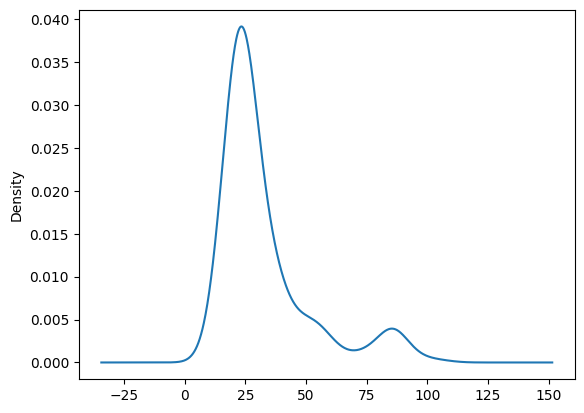

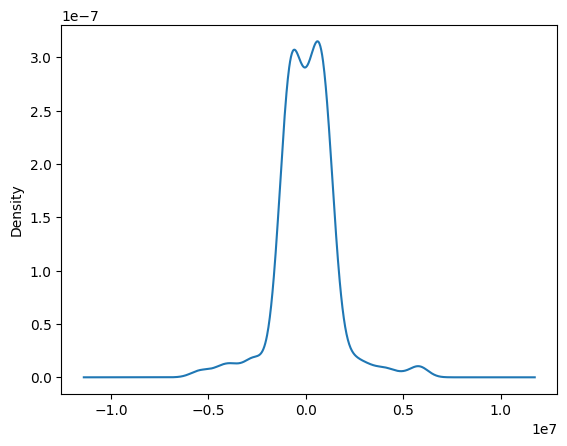

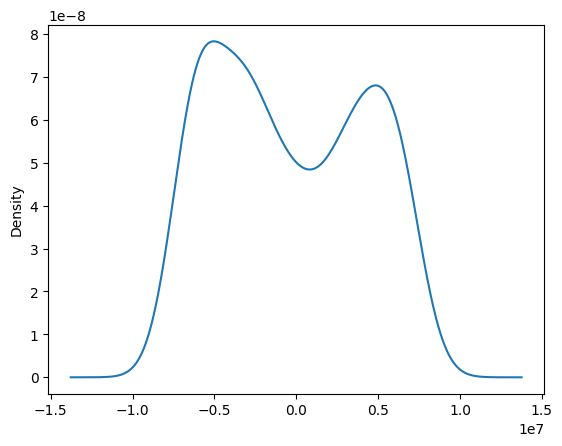

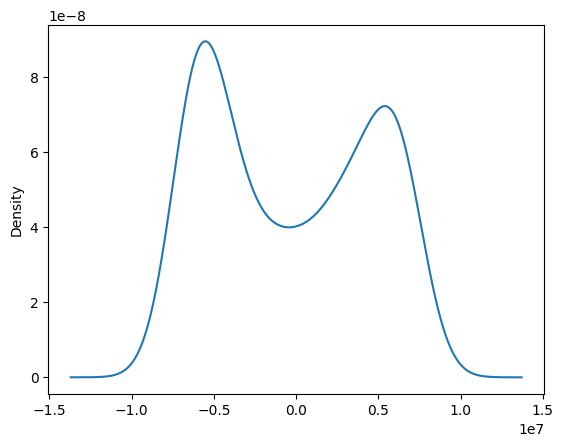

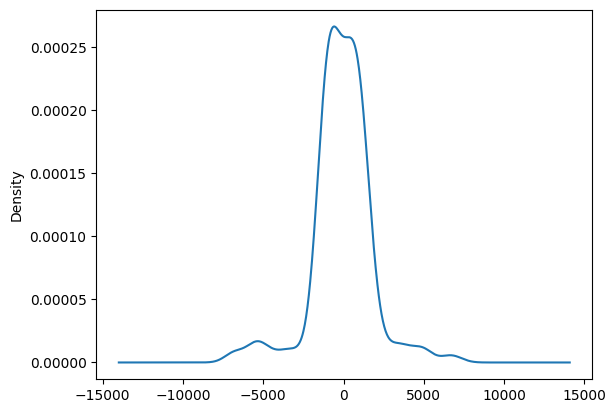

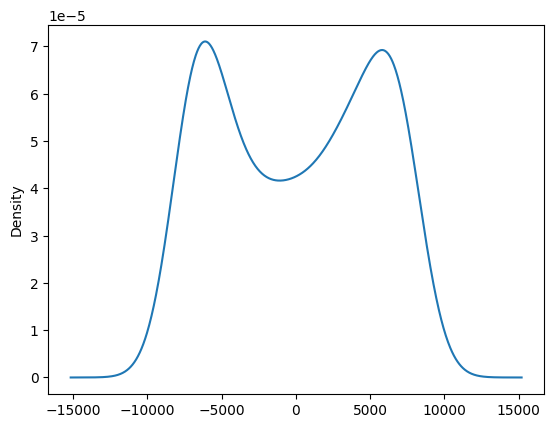

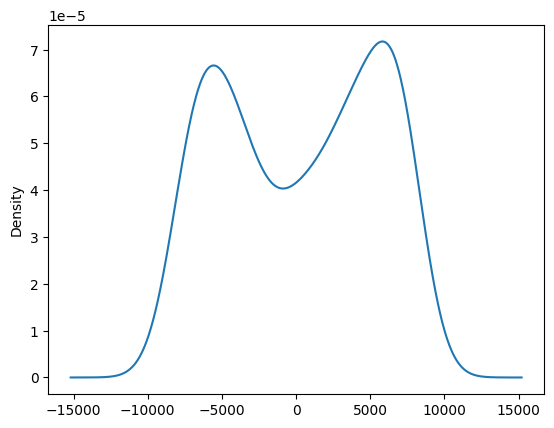

In [4]:
#Kernel densitiy estimation para as varias variaveis
#algoritmo que arranja uma PDF suave que melhor se ajusta aos dados

epochDensity = dados.epochSince.plot.kde()
plt.figure()
dragDensity = dados.drag.plot.kde()
plt.figure()

#POSICOES
#para a posicao no eixo do X o gráfico parece ter apenas um máximo à volta do zero
#para a posicao no Y e Z parece ter um formato identico, com dois maximos em cerca de -0.5e7 e 0.5e7
posXDensity = dados.posX.plot.kde()
plt.figure()
posYDensity = dados.posY.plot.kde()
plt.figure()
posZDensity = dados.posZ.plot.kde()

#VELOCIDADES
#em relacao ao formato dos graficos, o memso que acontece para as posicoes, acontece para as velocidades
plt.figure()
velXDensity = dados.velX.plot.kde()
plt.figure()
velYDensity = dados.velY.plot.kde()
plt.figure()
velZdensity = dados.velZ.plot.kde()



PMFs funcionam bem quando o nr de valores é pequeno. Com o aumento do nr de valores, a probabilidade associada a cada valor fica cada vez mais pequena e o efeito de noise aleatorio aumenta.

c:\Users\jpfun\Desktop\Gitlab Neuraspace\joao-funenga\Notebooks\EDA_utils\thinkstats2.py:161: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())


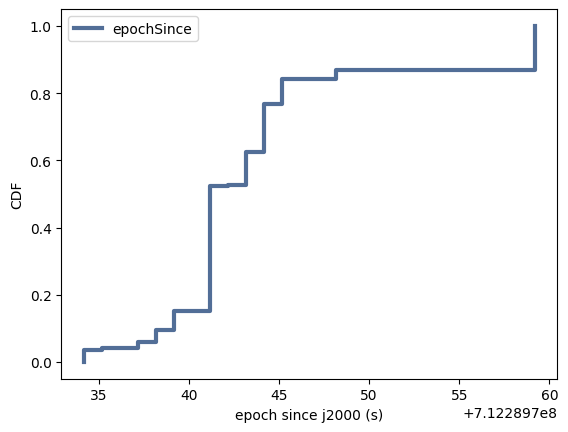

c:\Users\jpfun\Desktop\Gitlab Neuraspace\joao-funenga\Notebooks\EDA_utils\thinkstats2.py:161: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())


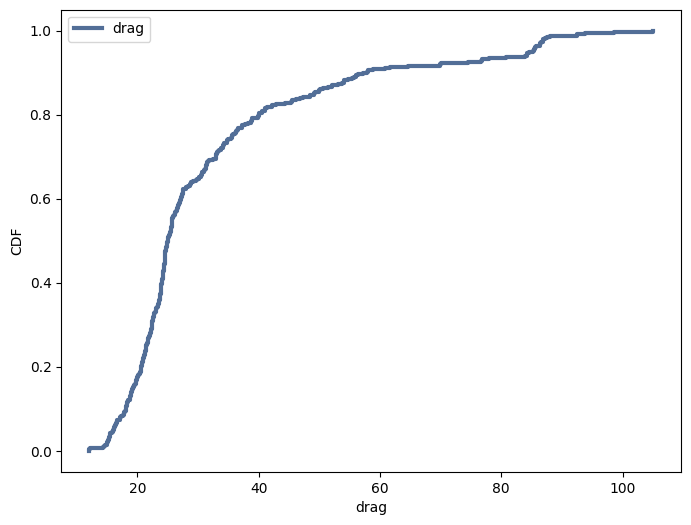

c:\Users\jpfun\Desktop\Gitlab Neuraspace\joao-funenga\Notebooks\EDA_utils\thinkstats2.py:161: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self.d.update(obj.value_counts().iteritems())


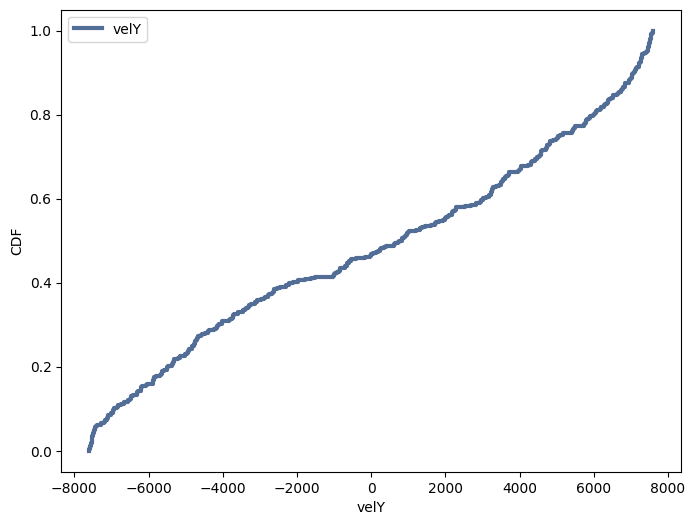

<Figure size 800x600 with 0 Axes>

In [5]:
import EDA_utils.thinkplot as thinkplot
import EDA_utils.thinkstats2 as thinkstats2


cdfEpoch = thinkstats2.Cdf(dados.epochSince, label='epochSince')
thinkplot.Cdf(cdfEpoch)
thinkplot.Show(xlabel='epoch since j2000 (s)', ylabel='CDF')


cdfDrag = thinkstats2.Cdf(dados.drag, label='drag')
thinkplot.Cdf(cdfDrag)
thinkplot.Show(xlabel='drag', ylabel='CDF')


cdfVel = thinkstats2.Cdf(dados.velZ, label='velY')
thinkplot.Cdf(cdfVel)
thinkplot.Show(xlabel='velY', ylabel='CDF')


80% das observacoes foram antes do que 45 + 7.1e8s


90% das observacoes têm drag menor que 60. Valores comuns aparecem como partes quase verticais em representacoes da CDF (isto acontece +- qd drag = 30)

In [ ]:
thinkplot.Cdf(cdfDrag, complement=True)
thinkplot.Show(xlabel='minutes',
ylabel='CCDF',
yscale='log')

#Devido à linha não ser reta, mostra que a distribuicao exponencial não é o modelo mais adequado para a variavel drag
#Assumption "drag" é igual para qualquer instante de tempo é errada.


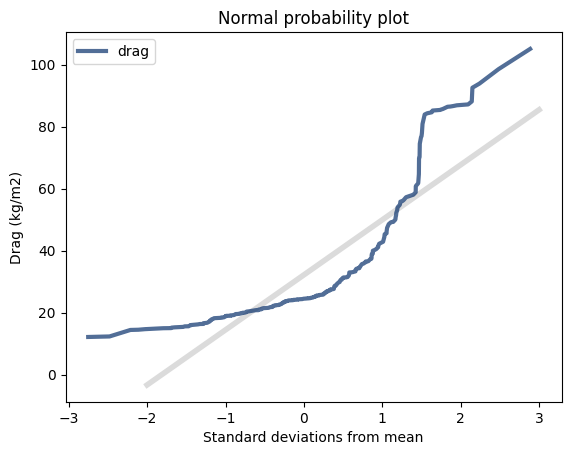

In [6]:
#Verificar normalidade

import numpy as np

mean, var = thinkstats2.TrimmedMeanVar(dados.drag, p=0.01)
std = np.sqrt(var)

xs = [-2, 3]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

xs, ys = thinkstats2.NormalProbability(dados.drag)
thinkplot.Plot(xs, ys, label="drag")

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Drag (kg/m2)",
)

Quando nao temos assim muitos dados, não esperamos que uma distribuicao empirica faça fit exato a uma analitica. Podemos avaliar a qualidade do fit gerando uma sample de uma distribuicao analitica e ver quao bem faz match aos dados. Tinhamos visto que o drag era +- exponencial

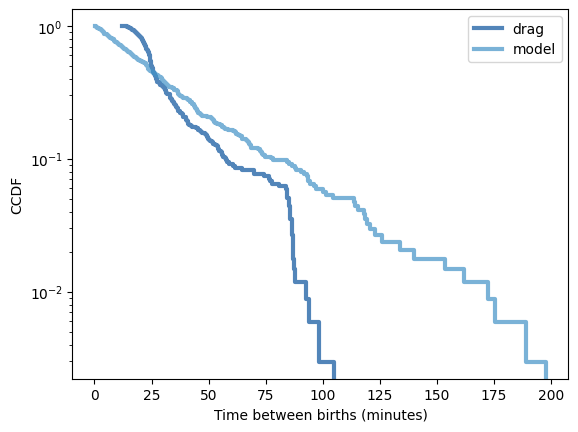

In [7]:
import random
# Solution
n = len(dados.drag)
lam = 44.0 / 24 / 60
sample = [random.expovariate(lam) for _ in range(n)]

model = thinkstats2.Cdf(sample, label='model')
    
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdfDrag, model], complement=True)
thinkplot.Config(xlabel='Time between births (minutes)',
                ylabel='CCDF',
                yscale='log')



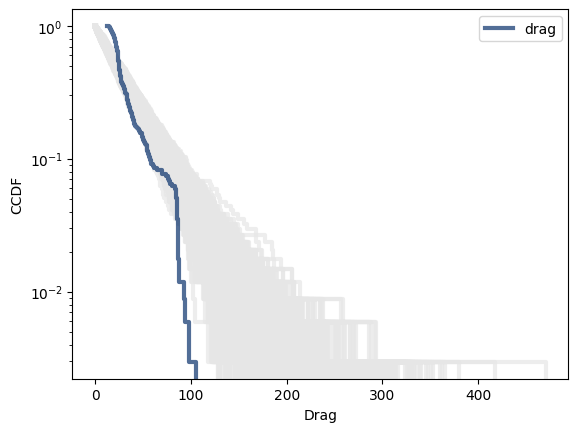

In [8]:
for i in range(1000):
    sample = [random.expovariate(lam) for _ in range(n)]
    thinkplot.Cdf(thinkstats2.Cdf(sample), complement=True, color="0.9")

thinkplot.Cdf(cdfDrag, complement=True)
thinkplot.Config(xlabel="Drag", ylabel="CCDF", yscale="log")

# Posições

In [30]:
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(
    x= dados.posX,
    y= dados.posY,
    z= dados.posZ,
 
    mode='markers',
    marker={
        'size': 10,
        'opacity': 0.8,
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

# Velocidades

In [ ]:
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(
    x= dados.velX,
    y= dados.velY,
    z= dados.velZ,
 
    mode='markers',
    marker={
        'size': 10,
        'opacity': 0.8,
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

# Relações entre variaveis

In [ ]:
# import seaborn as sns
# sns.pairplot(dados[dados.columns.difference(['srp'])])
# plt.show()

In [ ]:
# Pos X + Vel X

# Pos Y + Vel Y
# Pos Y + Vel Z
# Pos Y + Pos Z

# Pos Z + Vel Y
# Pos Z + Vel Z

# Vel Z + Vel Y

# FROM HERE ONWARDS IT DOESNT WORK BECAUSE IM STILL MISSING THE OREKIT INSTALL ZIP

# Orekit

In [ ]:
# import ns_sfd
# ns_sfd.datautils.data.get_package_data("data/orekit-data")

In [4]:
#Method to create new orbital representation and return dataframe with everything

from ns_sfd import dynamics
from ns_sfd import datautils
from ns_sfd.epoch import Epoch
from ns_sfd.frame import Frame
from ns_sfd.frame import FrameType
from ns_sfd.orbital_state import GeodeticCoordinates
from ns_sfd.orbital_state import KeplerianElements
from ns_sfd.orbital_state import OrbitalState
from ns_sfd.timescale import TimeScale
from ns_sfd.timescale import TimeScaleName
from ns_sfd.datamodel import api_model
import datetime


datautils.data.set_data_dir("data/orekit-data")


def createOrbitalRepresentation(dados):

    newdados = pd.DataFrame(columns=['satID', 'sma', 'ecc', 'inc', 'arg_perigee', 'raan', 'true_anomaly'])

    df = dados.reset_index()  # make sure indexes pair with number of rows
    for index, row in df.iterrows():

        x = row['posX']
        y = row['posY']
        z = row['posZ']

        velx = row['velX']
        vely = row['velY']
        velz = row['velZ']

        # epoch = Epoch(float(row["epochSince"]))
        # epoch = Epoch._from_absolute_date(time.AbsoluteDate(time.AbsoluteDate(), float(row["epochSince"])), tscale)
        
        #convert epochSince to timedate
        epochSinceTime = datetime.datetime(2000, 1, 1, 12, 0) + datetime.timedelta(seconds=float(row["epochSince"]))
        timescale = TimeScale(TimeScaleName.UTC)
        epoch = Epoch(epochSinceTime.year, epochSinceTime.month, epochSinceTime.day, epochSinceTime.hour, epochSinceTime.minute, float(epochSinceTime.second), timescale)
        frame = Frame(FrameType.EME2000)

        state = OrbitalState(
            float(x),
            float(y),
            float(z),
            float(velx),
            float(vely),
            float(velz),
            epoch,
            frame
        )
        #tirei o ultimo argumento (mass)


        mu = 3.9860044e14
        elements = state.get_keplerian_elements(mu=mu)

        #orbit semi-major axis.
        sma = elements.sma
        #orbit eccentricity.
        ecc = elements.ecc
        #orbit inclination.
        inc = elements.inc
        #orbit argument of perigee.
        arg_perigee = elements.arg_perigee
        #omega, orbit right ascension of ascending node.
        raan = elements.raan
        #where the satelite is (theta)
        true_anomaly = elements.true_anomaly

        dfRow = pd.DataFrame([[row["satID"], sma, ecc, inc, arg_perigee, raan, true_anomaly]], columns=['satID', 'sma', 'ecc', 'inc', 'arg_perigee', 'raan', 'true_anomaly'])
        # newdados = newdados.concat(dfRow, ignore_index=True)
        newdados = pd.concat([dfRow, newdados])

    mergedDf = pd.merge(dados, newdados, on="satID", how="left")
    return mergedDf

File or folder: c:\Users\jpfun\Desktop\Gitlab Neuraspace\joao-funenga\Notebooks\Notebooks\data\orekit-data  not found


        The Orekit library relies on some external data for physical models. 
        Typical data are the Earth Orientation Parameters and the leap seconds history, 
        both being provided by the IERS or the planetary ephemerides provided by JPL. 
        Such data is stored in text or binary files with specific formats that Orekit knows 
        how to read, and needs to be provided for the library to work.

        You can download a starting file with this data from the orekit gitlab at:
        https://gitlab.orekit.org/orekit/orekit-data

        or by the function:
        orekit.pyhelpers.download_orekit_data_curdir()

        


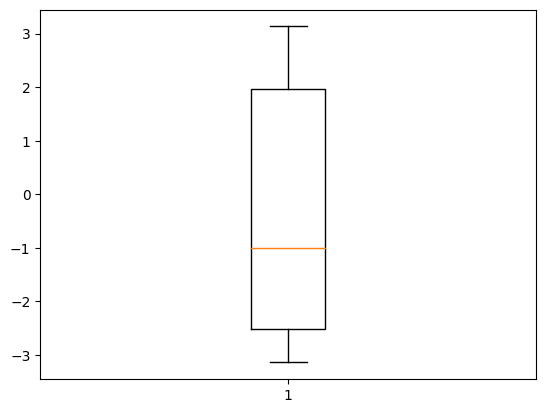

c:\Users\jpfun\Desktop\Gitlab Neuraspace\joao-funenga\venv\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


epochSince          posX          posY          posZ         velX  \
count  3.380000e+02  3.380000e+02  3.380000e+02  3.380000e+02   338.000000   
mean   7.122897e+08  4.845410e+04 -3.845441e+05 -3.489285e+05   -75.145958   
std    6.399121e+00  1.460854e+06  4.542397e+06  4.907230e+06  1866.933650   
min    7.122897e+08 -5.607862e+06 -6.893248e+06 -6.855671e+06 -6971.885542   
25%    7.122897e+08 -7.783343e+05 -4.466900e+06 -5.306951e+06  -953.917534   
50%    7.122897e+08  5.217947e+04 -8.811934e+05 -6.841072e+05   -47.606747   
75%    7.122897e+08  8.415251e+05  4.040874e+06  4.690952e+06   917.693687   
max    7.122898e+08  5.967451e+06  6.878584e+06  6.850335e+06  7068.440187   

              velY         velZ        drag    srp           sma         ecc  \
count   338.000000   338.000000  338.000000  338.0  3.380000e+02  338.000000   
mean     23.653909   281.736020   32.579581    inf  6.848689e+06    0.001647   
std    5269.131178  5191.360428   18.803896    NaN  5.306008e+04    0.001093   
min   -7578.805256 -7592.624068   12.121986    inf  6.654764e+06    0.000030   
25%   -5675.197445 -4781.993335   21.517144    NaN  6.810352e+06    0.000951   
50%     227.171805   788.407592   25.076256    NaN  6.841373e+06    0.001603   
75%    5115.325607  5071.316979   35.655813    NaN  6.889305e+06    0.002101   
max    7607.140573  7601.254637  105.027415    inf  7.053280e+06    0.014722   

              inc  arg_perigee        raan  true_anomaly  
count  338.000000   338.000000  338.000000    338.000000  
mean     1.682342     0.156468   -1.096693     -0.248768  
std      0.106510     2.671715    1.081465      2.231208  
min      0.923203    -5.599441   -2.515550     -3.139962  
25%      1.695669    -1.082114   -1.534883     -2.512091  
50%      1.697602     1.230945   -1.466775     -1.009271  
75%      1.698545     1.889260   -1.378571      1.961545  
max      1.719489     4.390980    2.997328      3.131789

In [5]:
mergedDf = createOrbitalRepresentation(dados)

#Para sma, nao ha outliers
# plt.boxplot(mergedDf.sma, notch=None, vert=None, patch_artist=None, widths=None)
plt.show()

#Para ecc, nao ha outliers
# plt.boxplot(mergedDf.ecc, notch=None, vert=None, patch_artist=None, widths=None)
plt.show()

#Para a inc, nao ha outliers
# plt.boxplot(mergedDf.inc, notch=None, vert=None, patch_artist=None, widths=None)
plt.show()

#Para o arg perigeu, nao ha outliers
# plt.boxplot(mergedDf.arg_perigee, notch=None, vert=None, patch_artist=None, widths=None)
plt.show()

#Para raan, ha outliers abaixo
# plt.boxplot(mergedDf.raan, notch=None, vert=None, patch_artist=None, widths=None)
plt.show()

#Para a true anomaly, nao ha outliers
plt.boxplot(mergedDf.true_anomaly, notch=None, vert=None, patch_artist=None, widths=None)
plt.show()


mergedDf.describe()

<Figure size 640x480 with 0 Axes>

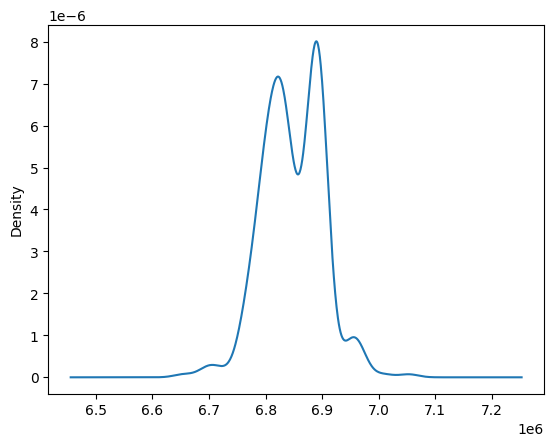

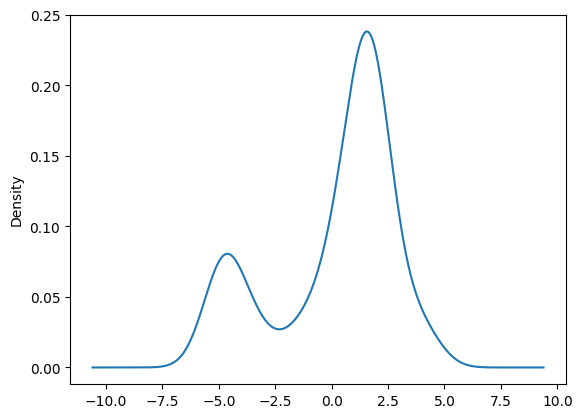

<Figure size 640x480 with 0 Axes>

In [12]:
#Kernel densitiy estimation para as varias variaveis
#algoritmo que arranja uma PDF suave que melhor se ajusta aos dados

smaDensity = mergedDf.sma.plot.kde()
plt.figure()
# eccDensity = mergedDf.ecc.plot.kde()
# plt.figure()
# incDensity = mergedDf.inc.plot.kde()
# plt.figure()
arg_perigeeDensity = mergedDf.arg_perigee.plot.kde()
plt.figure()
# raanDensity = mergedDf.raan.plot.kde()
# plt.figure()
# true_anomalyDensity = mergedDf.true_anomaly.plot.kde()
# plt.figure()



In [ ]:
#Verificar se alguma das novas variaveis segue uma distribuicao exponencial

# cdfSma = thinkstats2.Cdf(mergedDf.sma, label='velY')

# thinkplot.Cdf(cdfSma, complement=True)
# thinkplot.Show(xlabel='minutes',
# ylabel='CCDF',
# yscale='log')

##############
##############

# cdfEcc = thinkstats2.Cdf(mergedDf.ecc, label='velY')

# thinkplot.Cdf(cdfEcc, complement=True)
# thinkplot.Show(xlabel='minutes',
# ylabel='CCDF',
# yscale='log')

# ##############
# ##############

# cdfInc = thinkstats2.Cdf(mergedDf.inc, label='velY')

# thinkplot.Cdf(cdfInc, complement=True)
# thinkplot.Show(xlabel='minutes',
# ylabel='CCDF',
# yscale='log')

# ##############
# ##############

# cdfArg = thinkstats2.Cdf(mergedDf.arg_perigee, label='velY')

# thinkplot.Cdf(cdfArg, complement=True)
# thinkplot.Show(xlabel='minutes',
# ylabel='CCDF',
# yscale='log')

# ##############
# ##############

# cdfRaan = thinkstats2.Cdf(mergedDf.raan, label='velY')

# thinkplot.Cdf(cdfRaan, complement=True)
# thinkplot.Show(xlabel='minutes',
# ylabel='CCDF',
# yscale='log')


# ##############
# ##############

cdfTrueAnom = thinkstats2.Cdf(mergedDf.true_anomaly, label='velY')

thinkplot.Cdf(cdfTrueAnom, complement=True)
thinkplot.Show(xlabel='minutes',
ylabel='CCDF',
yscale='log')

In [ ]:
#Verificar normalidade

import numpy as np

mean, var = thinkstats2.TrimmedMeanVar(mergedDf.raan, p=0.01)
std = np.sqrt(var)

xs = [-2, 3]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

xs, ys = thinkstats2.NormalProbability(mergedDf.raan)
thinkplot.Plot(xs, ys, label="drag")

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Drag (kg/m2)",
)


# from scipy import stats
# stats.shapiro(mergedDf.ecc)
#laplace cauchy

In [ ]:
# import seaborn as sns
# sns.pairplot(mergedDf[mergedDf.columns.difference(['srp'])])
# plt.show()

# Compare orbital parameters from different epochs

In [ ]:
#Download ficheiros states
# import urllib

# for ano in range(2020, 2022):
#     for mes in range(1, 13):
#         if mes < 10:
#             mes = "0" + str(mes)
#         for dia in range(1, 29):
#             if dia < 10:
#                 dia = "0" + str(dia)
#             print("Ano " + str(ano) + "Mes " + str(mes) + " Dia " + str(dia))
#             urlToDownload = "https://ephemerides.planet-labs.com/planet_"+ str(ano) + str(mes) + str(dia) + ".states"
#             try:
#                 urllib.request.urlretrieve(urlToDownload, "./dadosDownloaded/planet_" +  str(ano) + str(mes) + str(dia) + ".states")
#             except:
#                 print("An exception occurred")
#                 # print(urlToDownload)
            

In [ ]:
# directory = "./dadosDownloaded/"

# allFilesOrbital = pd.DataFrame()
# fileIndex = 1
# for filename in os.scandir(directory):
#     if filename.is_file():
#         dados = pd.read_csv(filename.path,  header = None, engine='python', delim_whitespace=True, names=["satID" ,"epochSince", "posX", "posY", "posZ", "velX", "velY", "velZ", "drag","srp"])  
#         dfConvertedToOrbital = createOrbitalRepresentation(dados)
#         allFilesOrbital = allFilesOrbital.append(dfConvertedToOrbital, ignore_index=True)
#         # plt.plot(dfConvertedToOrbital.inc, '.')
#         #max = 573 files
#         if fileIndex == 573:
#             break
#         fileIndex += 1

# allFilesOrbital.to_pickle("./allFilesOrbital.pkl")  

Arg Perigee


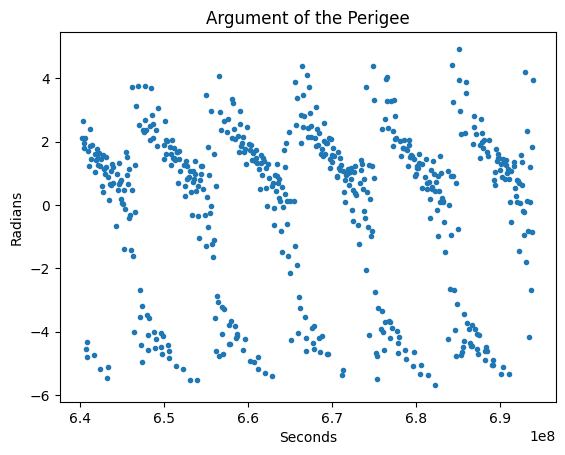

Raan


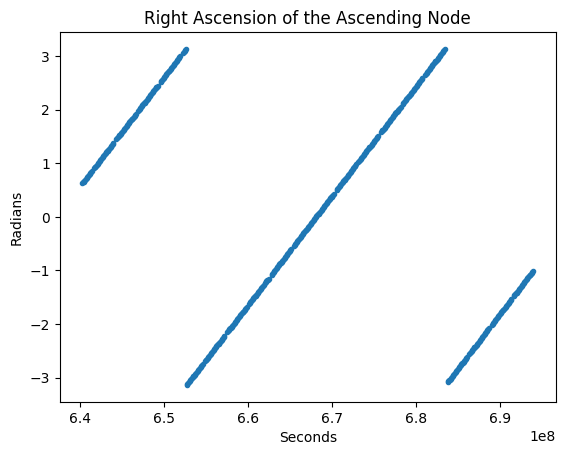

True Anomaly


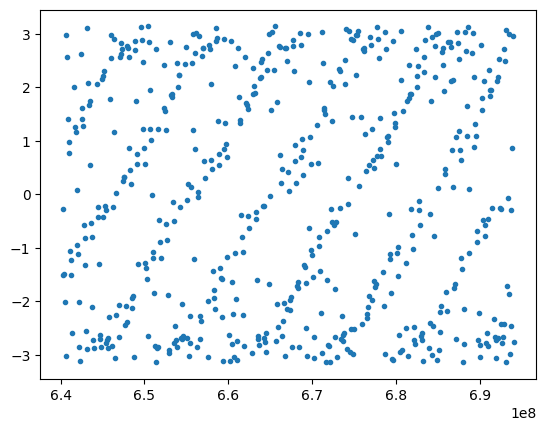

Eccentricity


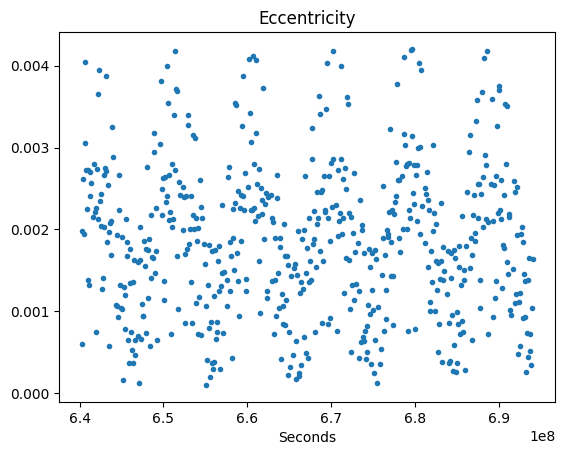

Semi Major Axis


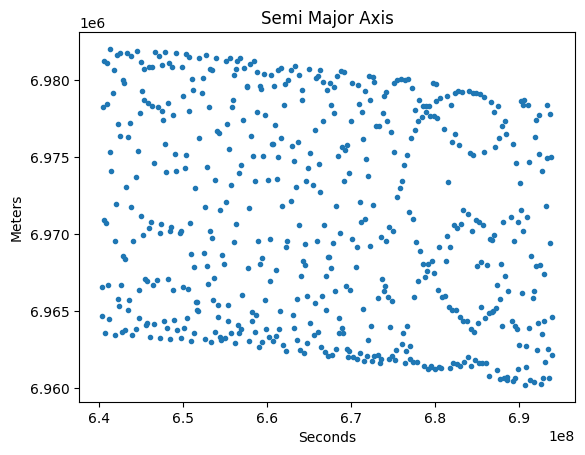

Inclination


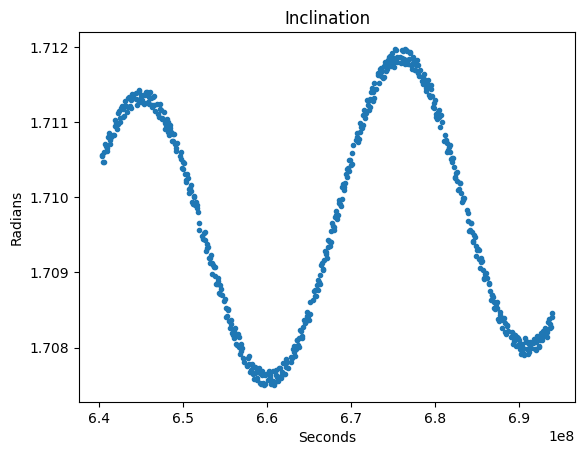

Ballistic Coefficient


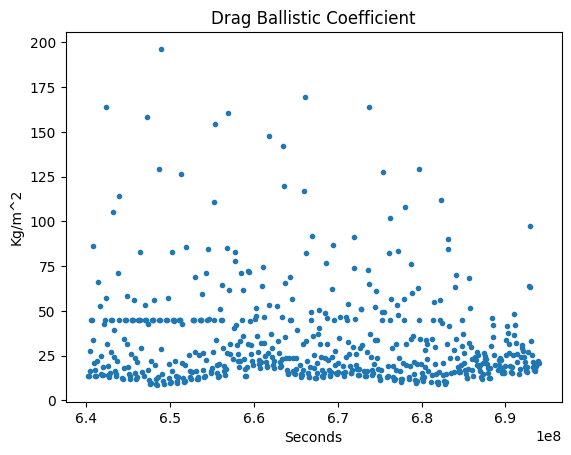

In [6]:
from turtle import color
import pandas as pd

allFilesOrbitalUnpickled = pd.read_pickle("../data/allFilesOrbital.pkl")  


#plot same satellite stats
allIds = allFilesOrbitalUnpickled["satID"].unique()


#para um satelite em especifico [index 1], comparar os valores dos parametros orbitais (entre os varios dias)
dataID = allFilesOrbitalUnpickled[allFilesOrbitalUnpickled["satID"] == allIds[2]]
# print(dataID)
# plt.plot(dataID.arg_perigee[:40], '.')
print("Arg Perigee")
plt.ylabel('Radians')
plt.xlabel('Seconds')
plt.title('Argument of the Perigee')
plt.plot(dataID.epochSince, dataID.arg_perigee, '.')
plt.savefig('arg_perigee.pdf')
plt.show()

print("Raan")
#add units to plot
plt.ylabel('Radians')
plt.xlabel('Seconds')
plt.title('Right Ascension of the Ascending Node')
plt.plot(dataID.epochSince, dataID.raan, '.')
plt.savefig('raan.pdf')
plt.show()


print("True Anomaly")
plt.plot(dataID.epochSince,dataID.true_anomaly, '.')
plt.show()


print("Eccentricity")
# plt.ylabel('Radians')
plt.xlabel('Seconds')
plt.title('Eccentricity')
plt.plot(dataID.epochSince, dataID.ecc, '.')
plt.savefig('eccentricity.pdf')
plt.show()


print("Semi Major Axis")
plt.ylabel('Meters')
plt.xlabel('Seconds')
plt.title('Semi Major Axis')
plt.plot(dataID.epochSince, dataID.sma, '.')
plt.savefig('sma.pdf')
plt.show()


print("Inclination")
plt.ylabel('Radians')
plt.xlabel('Seconds')
plt.title('Inclination')
plt.plot(dataID.epochSince, dataID.inc, '.')
plt.savefig('inclination.pdf')
plt.show()


print("Ballistic Coefficient")
plt.ylabel('Kg/m^2')
plt.xlabel('Seconds')
plt.title('Drag Ballistic Coefficient')
plt.plot(dataID.epochSince, dataID.drag, '.')
plt.savefig('ballisticDrag.pdf')
plt.show()


# for j in range(1,len(dataID)):
#     col = (np.random.random(), np.random.random(), np.random.random())
#     # print(col)
#     #colors = ["r", "g", "b", "y"]
#     #random color from colors
#     #randomColor = colors[np.random.randint(0, len(colors))]
#     plt.plot(dataID.arg_perigee, '-', color=col)
#     #plt.show
# plt.figure()

#passar o semieixo maior para km e retirar o raio da terra (6371km)
# ver diferencas entre as constelacoes dos satelites (maybe agrupar satelites por clusters)


In [ ]:
#Calcular excentricidade
# print(dataID.sma.iloc[0])
smAxis = dataID.sma.iloc[0]
eccentricity = dataID.ecc.iloc[0]
trueAnom = dataID.true_anomaly.iloc[0]

raioApogeu = smAxis * (1 + eccentricity)
raioPerigeu = smAxis * (1 - eccentricity)

print(raioApogeu)
print(raioPerigeu)

R = smAxis * (1-eccentricity**2)/ (1+eccentricity* np.cos(trueAnom))
print(R)

norma = np.linalg.norm([dataID.posX.iloc[0], dataID.posY.iloc[0], dataID.posZ.iloc[0]])
print(norma)

print(norma - R)

print((1-eccentricity**2)/ (1+eccentricity* np.cos(trueAnom)))

In [ ]:
#Verificar se alguma exponencial
cdfPosID = thinkstats2.Cdf(dataID.drag, label='drag')
thinkplot.Cdf(cdfPosID)
thinkplot.Show(xlabel='drag', ylabel='CDF')

thinkplot.Cdf(cdfPosID, complement=True)
thinkplot.Show(xlabel='drag',
ylabel='CCDF',
yscale='log')

In [ ]:
#Verificar normalidade

import numpy as np

mean, var = thinkstats2.TrimmedMeanVar(dataID.velZ, p=0.1)
std = np.sqrt(var)

xs = [-2, 3]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8", label="model")

xs, ys = thinkstats2.NormalProbability(dataID.velZ)
thinkplot.Plot(xs, ys, label="velZ")

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Velocity Z (m/s)",
)

In [ ]:
import seaborn as sns
sns.pairplot(dataID[dataID.columns.difference(['srp'])])
plt.show()

In [ ]:
print("=========================================================")

#todos gráficos para N satélites
N = 2
for i in allIds[:N]:
#     # plt.show()
#     # plt.plot(allFilesOrbitalUnpickled[allFilesOrbitalUnpickled["satID"] == i].arg_perigee, '-')
#     plt.show()
#     plt.plot(allFilesOrbitalUnpickled[allFilesOrbitalUnpickled["satID"] == i].raan, '-')
    # plt.show()
    plt.plot(allFilesOrbitalUnpickled[allFilesOrbitalUnpickled["satID"] == i].epochSince, allFilesOrbitalUnpickled[allFilesOrbitalUnpickled["satID"] == i].true_anomaly, '.')
    plt.show()
#     plt.plot(allFilesOrbitalUnpickled[allFilesOrbitalUnpickled["satID"] == i].ecc, '-')
#     plt.show()
#     plt.plot(allFilesOrbitalUnpickled[allFilesOrbitalUnpickled["satID"] == i].sma, '-')
#     plt.show()

# satIdPlot = allFilesOrbitalUnpickled["satID"][2]
# dataToPlot = allFilesOrbitalUnpickled[allFilesOrbitalUnpickled["satID"] == satIdPlot]
# plt.plot(dataToPlot.epochSince, dataToPlot.drag, '.')

In [7]:
#explosoes solares e outras perturbacoes podem afetar o plano orbital

import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# orderedAux = dataID.sort_values('true_anomaly')
# print(orderedAux)
# Configure the trace.
print(dataID)
trace = go.Scatter3d(
    x= dataID.posX[:300],
    y= dataID.posY[:300],
    z= dataID.posZ[:300],
 
    mode='markers',
    marker={
        'size': 10,
        'opacity': 0.8,
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

#save as pdf
plotly.io.write_image(plot_figure, 'output_file.pdf', format='pdf')

       satID    epochSince          posX          posY          posZ  \
2       0903  6.402601e+08 -9.062010e+05 -1.806163e+06  6.660926e+06   
248     0903  6.403465e+08  2.813836e+06  9.946230e+05  6.293880e+06   
494     0903  6.404329e+08  5.191148e+06  3.461686e+06  3.121400e+06   
740     0903  6.405193e+08  5.203141e+06  4.434655e+06 -1.442530e+06   
986     0903  6.406057e+08  2.912542e+06  3.404751e+06 -5.367801e+06   
...      ...           ...           ...           ...           ...   
172361  0903  6.936566e+08 -1.802696e+06  4.734097e+06 -4.792293e+06   
172696  0903  6.937430e+08 -3.248735e+06  6.075135e+06 -1.085930e+06   
173031  0903  6.938294e+08 -3.550572e+06  5.261844e+06  2.887033e+06   
173366  0903  6.939158e+08 -2.577256e+06  2.648988e+06  5.911481e+06   
173701  0903  6.940077e+08  6.174161e+05 -2.628090e+06  6.428860e+06   

               velX         velY         velZ       drag  srp           sma  \
2      -6096.305025 -4051.004475 -1929.165161  13.618140

The orbit of a specific satellite changes over time which means in the long run it will completely cover the earth.

In [ ]:
print(dataID.epochSince.iloc[1] - dataID.epochSince.iloc[0])
print(dataID.epochSince.iloc[2] - dataID.epochSince.iloc[1])

In [22]:
# allFilesOrbitalUnpickled
import math


def cartesianToPolar(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    long = math.acos(x / np.sqrt(x**2 + y**2)) * (-1 if y < 0 else 1)
    lat = math.acos(z / r)
    return r, long, lat


allFilesOrbitalUnpickled = pd.read_pickle("../data/allFilesOrbital.pkl")  
#plot same satellite stats
allIds = allFilesOrbitalUnpickled["satID"].unique()
#para um satelite em especifico [index 1], comparar os valores dos parametros orbitais (entre os varios dias)
newDataID = allFilesOrbitalUnpickled[allFilesOrbitalUnpickled["satID"] == allIds[2]]

#apply cartesianToPolar to all rows
newDataID[['r', 'long', 'lat']] = newDataID.apply(lambda row: cartesianToPolar(row['posX'], row['posY'], row['posZ']), axis=1, result_type="expand")

C:\Users\jpfun\AppData\Local\Temp\ipykernel_163032\3900724317.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jpfun\AppData\Local\Temp\ipykernel_163032\3900724317.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\jpfun\AppData\Local\Temp\ipykernel_163032\3900724317.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
# sns.pairplot(newDataID[newDataID.columns.difference(['srp'])])
# plt.show()

In [23]:
#create equinoctial orbital representation
from org.orekit import orbits

def EquinoctialOrbitRepresentation(dados):
    oldColumnNames = dados.columns.values
    
    newColumnNames = np.hstack([oldColumnNames, ['smaDerivative', 'eccDerivative', 'firstEccDeriv', 'firstEcc', 'secEccDeriv', 'secEcc', 'incDot', 'firstInc', 
         'firstIncDeriv', 'secInc', 'secIncDeriv', 'eccLongitude', 'eccLongitudeDot', 'meanLongitude', 'meanLongitudeDot', 'trueLongitude', 'trueLongitudeDot']])

    newdados = pd.DataFrame(columns = newColumnNames)
    print(newColumnNames)
    df = dados.reset_index()  # make sure indexes pair with number of rows
    for index, row in df.iterrows():


        epochSinceTime = datetime.datetime(2000, 1, 1, 12, 0) + datetime.timedelta(seconds=float(row["epochSince"]))

        x = row['posX']
        y = row['posY']
        z = row['posZ']
        velx = row['velX']
        vely = row['velY']
        velz = row['velZ']

        timescale = TimeScale(TimeScaleName.UTC)
        epoch = Epoch(epochSinceTime.year, epochSinceTime.month, epochSinceTime.day, epochSinceTime.hour, epochSinceTime.minute, float(epochSinceTime.second), timescale)
        frame = Frame(FrameType.EME2000)

        state = OrbitalState(
            float(x),
            float(y),
            float(z),
            float(velx),
            float(vely),
            float(velz),
            epoch,
            frame
        )
        #tirei o ultimo argumento (mass)


        mu = 3.9860044e14
        elements = state.get_keplerian_elements(mu=mu)


        # #get frame ?
        # orekitFrame = state.get_frame()
        orekitEquivalent = state._get_service_object()
        
        # #TODO Cartesian orbit to equinoctial
        equinoctialOrbit = orbits.EquinoctialOrbit(state._get_service_object().getPVCoordinates(), state.get_frame()._get_service_object(), mu)
        
       



        #orbit semi-major axis derivative.
        smaDot = equinoctialOrbit.getADot()

        ####################
        #Eccectricity
        ####################

        #eccentricity derivative
        eccDot = equinoctialOrbit.getEDot()
        #first component equinoctial eccentricity vector derivative
        firstEccDeriv = equinoctialOrbit.getEquinoctialEx()
        #first component equinoctial eccentricity vector
        firstEcc = equinoctialOrbit.getEquinoctialExDot()
        
        #second component of the equinoctial eccentricity vector derivative
        secEccDeriv = equinoctialOrbit.getEquinoctialEy()
        #second component equinoctial eccentricity vector
        secEcc = equinoctialOrbit.getEquinoctialEyDot()

        ####################
        #Inclination
        ####################

        #inclination derivative
        incDot = equinoctialOrbit.getIDot()
        #first component inclination vector
        firstInc = equinoctialOrbit.getHx()
        #first component of the inclination vector derivative
        firstIncDeriv = equinoctialOrbit.getHxDot()
        #second component of the inclination vector
        secInc = equinoctialOrbit.getHy()
        #second component of the inclination vector derivative
        secIncDeriv = equinoctialOrbit.getHyDot()

        ####################
        #Longitude
        ####################
        #eccentric longitude argument.
        eccLongitude = equinoctialOrbit.getLE()
        #eccentric longitude argument derivative
        eccLongitudeDot = equinoctialOrbit.getLEDot()
        #mean longitude argument
        meanLongitude = equinoctialOrbit.getLM()
        #mean longitude argument derivative
        meanLongitudeDot = equinoctialOrbit.getLMDot()
        #true longitude argument
        trueLongitude = equinoctialOrbit.getLv()
        #true longitude argument derivative
        trueLongitudeDot = equinoctialOrbit.getLvDot()
        

        dfRow = pd.DataFrame([[row["satID"], row['epochSince'], row['posX'], row['posY'], row['posZ'], row['velX'], row['velY'], row['velZ'], row['drag'], row['srp'], row['sma'], row['ecc'], row['inc'], row['arg_perigee'], row['raan'], row['true_anomaly'], row['r'], row['long'], row['lat'],
            smaDot, eccDot, firstEccDeriv, firstEcc, secEccDeriv, secEcc, incDot, firstInc, firstIncDeriv, secInc, secIncDeriv, eccLongitude, eccLongitudeDot, meanLongitude, meanLongitudeDot, trueLongitude, trueLongitudeDot]], columns = newColumnNames)

        newdados = pd.concat([dfRow, newdados])
    return newdados

newDataIDEquinoctial = EquinoctialOrbitRepresentation(newDataID)


['satID' 'epochSince' 'posX' 'posY' 'posZ' 'velX' 'velY' 'velZ' 'drag'
 'srp' 'sma' 'ecc' 'inc' 'arg_perigee' 'raan' 'true_anomaly' 'r' 'long'
 'lat' 'smaDerivative' 'eccDerivative' 'firstEccDeriv' 'firstEcc'
 'secEccDeriv' 'secEcc' 'incDot' 'firstInc' 'firstIncDeriv' 'secInc'
 'secIncDeriv' 'eccLongitude' 'eccLongitudeDot' 'meanLongitude'
 'meanLongitudeDot' 'trueLongitude' 'trueLongitudeDot']


In [ ]:
newDataIDEquinoctial.iloc[0]
#Qual a diferenca entre a longitude da representacao polar com a longitude dada pela orbita equinoctial?
#Porque as derivadas sao todas NaN?

In [ ]:
# sns.pairplot(newDataIDEquinoctial[newDataIDEquinoctial.columns.difference(['srp', 'smaDerivative', 'eccDerivative', 'firstEcc', 'secEcc', 'incDot', 'firstIncDeriv', 'secIncDeriv', 'eccLongitudeDot', 'meanLongitudeDot', 'trueLongitudeDot'])])
# plt.show()

In [ ]:
#TODO

#juntar os dados de kp, ap e f10.7obs DONE

#Pegar na covariancia drag vs perigeu e perceber a zona de maior variancia

# Ver variacao do Raan com o angulo do satélite (porque quando o satelite está no plano do equador (qd a inclinacao é 0) ele é pouco afetado pela forma achatada da terra mas quando tem uma orbita inclinada ele é mt afetado pela oblateness)
# Uma das perturbacoes que acontece neste caso é que o plano da órbita roda (por isso é que o raan vai ter uma variacao linear ao longo do tempo).

# Outra coisa que acontece é o semi-major axis ir decrescendo lentamente (satelite vai perdendo altitude pq tem o drag a retirar energia) e por estarem a uma altitude mais baixa, o drag é maior.
# Para a eccentricity seria esperado que ela descesse porque uma das caracteristicas do drag é circularizar as orbitas 


#Perceber modelos analitics para estas relacoes entre variaveis
#Equacoes diferenciais para as variaveis (ró e drag) em diferentes tipos de coordenadas (efeito do ró na posição e velocidade nestes vários sistemas)
#Maybe usar a sindy para deriivar novas PDEs para os modelos de elementos orbitais


In [24]:
import datetime
#convert each line of the dataframe from j2000 to datetime
newDataTestID = newDataIDEquinoctial.copy()
newDataTestID["epochSince"]
newDataTestID["epochSinceDate"] = newDataTestID["epochSince"].apply(lambda x: datetime.datetime(2000, 1, 1, 12, 0) +  datetime.timedelta(seconds=x))
newDataTestID["epochSinceDate"] = newDataTestID["epochSinceDate"].apply(lambda x: x.strftime("%Y-%m-%d"))
newDataTestID


# datetime.datetime(2000, 1, 1, 12, 0) + datetime.timedelta(seconds=559889620.293)

satID    epochSince          posX          posY          posZ         velX  \
0   0903  6.940077e+08  6.174161e+05 -2.628090e+06  6.428860e+06 -4096.876053   
0   0903  6.939158e+08 -2.577256e+06  2.648988e+06  5.911481e+06 -2915.349355   
0   0903  6.938294e+08 -3.550572e+06  5.261844e+06  2.887033e+06  -788.375809   
0   0903  6.937430e+08 -3.248735e+06  6.075135e+06 -1.085930e+06  1475.394645   
0   0903  6.936566e+08 -1.802696e+06  4.734097e+06 -4.792293e+06  3149.041900   
..   ...           ...           ...           ...           ...          ...   
0   0903  6.406057e+08  2.912542e+06  3.404751e+06 -5.367801e+06  4916.844817   
0   0903  6.405193e+08  5.203141e+06  4.434655e+06 -1.442530e+06  1861.210082   
0   0903  6.404329e+08  5.191148e+06  3.461686e+06  3.121400e+06 -2141.312061   
0   0903  6.403465e+08  2.813836e+06  9.946230e+05  6.293880e+06 -5280.836357   
0   0903  6.402601e+08 -9.062010e+05 -1.806163e+06  6.660926e+06 -6096.305025   

           velY         velZ       drag  srp  ...  firstIncDeriv    secInc  \
0   5730.339391  2730.959553  20.571642  inf  ...   2.572604e-20 -0.968460   
0   5800.837468 -3868.687469  20.595502  inf  ...  -1.136603e-20 -0.979727   
0   3203.612419 -6803.549112  21.947170  inf  ...  -3.141787e-21 -0.990034   
0   -534.577725 -7397.212653  20.615901  inf  ...   1.818839e-20 -1.000168   
0  -4261.857017 -5389.663741  19.113755  inf  ...   4.808555e-20 -1.010059   
..          ...          ...        ...  ...  ...            ...       ...   
0   3225.602653  4717.562016  45.000000  inf  ...  -1.003880e-20  0.735710   
0    174.774773  7314.738571  27.379230  inf  ...   1.021375e-20  0.719943   
0  -2842.415298  6669.392789  16.609453  inf  ...  -3.687124e-20  0.704003   
0  -4475.702760  3051.648117  13.697342  inf  ...   1.953630e-21  0.688019   
0  -4051.004475 -1929.165161  13.618140  inf  ...  -2.354160e-20  0.671851   

     secIncDeriv  eccLongitude  eccLongitudeDot  meanLongitude  \
0   5.021939e-21      0.193398         0.001085       0.194012   
0  -2.187539e-20      1.091412         0.001085       1.091217   
0   3.148984e-20      1.669973         0.001084       1.669707   
0  -2.292407e-20      2.241662         0.001084       2.241813   
0  -1.534699e-20      2.833106         0.001085       2.833561   
..           ...           ...              ...            ...   
0   1.966003e-21     -0.193013         0.001081      -0.192633   
0   5.138637e-21      0.467886         0.001081       0.469639   
0  -7.761507e-20      1.129914         0.001083       1.132522   
0  -8.758361e-21      1.792242         0.001086       1.794222   
0   1.931425e-20      2.454684         0.001087       2.454851   

    meanLongitudeDot  trueLongitude  trueLongitudeDot  epochSinceDate  
0           0.001087       0.192784          0.001084      2021-12-28  
0           0.001086       1.091607          0.001084      2021-12-27  
0           0.001084       1.670239          0.001084      2021-12-26  
0           0.001083       2.241511          0.001084      2021-12-25  
0           0.001085       2.832652          0.001084      2021-12-24  
..               ...            ...               ...             ...  
0           0.001085      -0.193393          0.001078      2020-04-19  
0           0.001082       0.466132          0.001081      2020-04-18  
0           0.001083       1.127305          0.001084      2020-04-17  
0           0.001086       1.790262          0.001086      2020-04-16  
0           0.001086       2.454518          0.001087      2020-04-15  

[573 rows x 37 columns]

In [25]:
#Kp = used to characterize the magnitude of geomagnetic storms. Kp is an excellent indicator of disturbances in the Earth's magnetic 
# field and is used by SWPC to decide whether geomagnetic alerts and warnings need to be issued for users who are affected by these disturbances.
#The principal users affected by geomagnetic storms are the electrical power grid, spacecraft operations,
#  users of radio signals that reflect off of or pass through the ionosphere, and observers of the aurora.

#Ap = it is a measure of the global scale of disturbance of the Earth's magnetic field and correlates to the breadth of the auroral oval.

#F10.7_OBS =	Observed 10.7-cm Solar Radio Flux (F10.7). Measured at Ottawa at 1700 UT daily
#               from 1947 Feb 14 until 1991 May 31 and measured at Penticton at 2000 UT from 1991 Jun 01 on. Expressed in units of 10-22 W/m2/Hz.


#índices Kp e Ap às 12 para cada dia, e o F10.7_OBS (kp4, ap4, )?


solarData = pd.read_csv("../data/SW-Last5Years.csv")
# solarData
solarData = solarData[['DATE', 'KP4', 'AP4', 'F10.7_OBS']]
solarData.rename(columns = {'DATE':'epochSinceDate'}, inplace = True)

left_mergedID = pd.merge(newDataTestID, solarData, how="left", on=["epochSinceDate"])
left_mergedID
#ver se existe correlacao com as variaveis de atividade solar



satID    epochSince          posX          posY          posZ  \
0    0903  6.940077e+08  6.174161e+05 -2.628090e+06  6.428860e+06   
1    0903  6.939158e+08 -2.577256e+06  2.648988e+06  5.911481e+06   
2    0903  6.938294e+08 -3.550572e+06  5.261844e+06  2.887033e+06   
3    0903  6.937430e+08 -3.248735e+06  6.075135e+06 -1.085930e+06   
4    0903  6.936566e+08 -1.802696e+06  4.734097e+06 -4.792293e+06   
..    ...           ...           ...           ...           ...   
568  0903  6.406057e+08  2.912542e+06  3.404751e+06 -5.367801e+06   
569  0903  6.405193e+08  5.203141e+06  4.434655e+06 -1.442530e+06   
570  0903  6.404329e+08  5.191148e+06  3.461686e+06  3.121400e+06   
571  0903  6.403465e+08  2.813836e+06  9.946230e+05  6.293880e+06   
572  0903  6.402601e+08 -9.062010e+05 -1.806163e+06  6.660926e+06   

            velX         velY         velZ       drag  srp  ...  eccLongitude  \
0   -4096.876053  5730.339391  2730.959553  20.571642  inf  ...      0.193398   
1   -2915.349355  5800.837468 -3868.687469  20.595502  inf  ...      1.091412   
2    -788.375809  3203.612419 -6803.549112  21.947170  inf  ...      1.669973   
3    1475.394645  -534.577725 -7397.212653  20.615901  inf  ...      2.241662   
4    3149.041900 -4261.857017 -5389.663741  19.113755  inf  ...      2.833106   
..           ...          ...          ...        ...  ...  ...           ...   
568  4916.844817  3225.602653  4717.562016  45.000000  inf  ...     -0.193013   
569  1861.210082   174.774773  7314.738571  27.379230  inf  ...      0.467886   
570 -2141.312061 -2842.415298  6669.392789  16.609453  inf  ...      1.129914   
571 -5280.836357 -4475.702760  3051.648117  13.697342  inf  ...      1.792242   
572 -6096.305025 -4051.004475 -1929.165161  13.618140  inf  ...      2.454684   

     eccLongitudeDot  meanLongitude  meanLongitudeDot  trueLongitude  \
0           0.001085       0.194012          0.001087       0.192784   
1           0.001085       1.091217          0.001086       1.091607   
2           0.001084       1.669707          0.001084       1.670239   
3           0.001084       2.241813          0.001083       2.241511   
4           0.001085       2.833561          0.001085       2.832652   
..               ...            ...               ...            ...   
568         0.001081      -0.192633          0.001085      -0.193393   
569         0.001081       0.469639          0.001082       0.466132   
570         0.001083       1.132522          0.001083       1.127305   
571         0.001086       1.794222          0.001086       1.790262   
572         0.001087       2.454851          0.001086       2.454518   

     trueLongitudeDot  epochSinceDate   KP4  AP4  F10.7_OBS  
0            0.001084      2021-12-28  17.0  6.0      120.5  
1            0.001084      2021-12-27  23.0  9.0      123.9  
2            0.001084      2021-12-26  10.0  4.0      125.4  
3            0.001084      2021-12-25  17.0  6.0      130.7  
4            0.001084      2021-12-24  13.0  5.0      126.2  
..                ...             ...   ...  ...        ...  
568          0.001078      2020-04-19   0.0  0.0       68.6  
569          0.001081      2020-04-18  10.0  4.0       69.8  
570          0.001084      2020-04-17  10.0  4.0       67.9  
571          0.001086      2020-04-16   3.0  2.0       68.5  
572          0.001087      2020-04-15  10.0  4.0       68.4  

[573 rows x 40 columns]

In [ ]:
plt.plot(left_mergedID.epochSince, left_mergedID.arg_perigee, 'o')

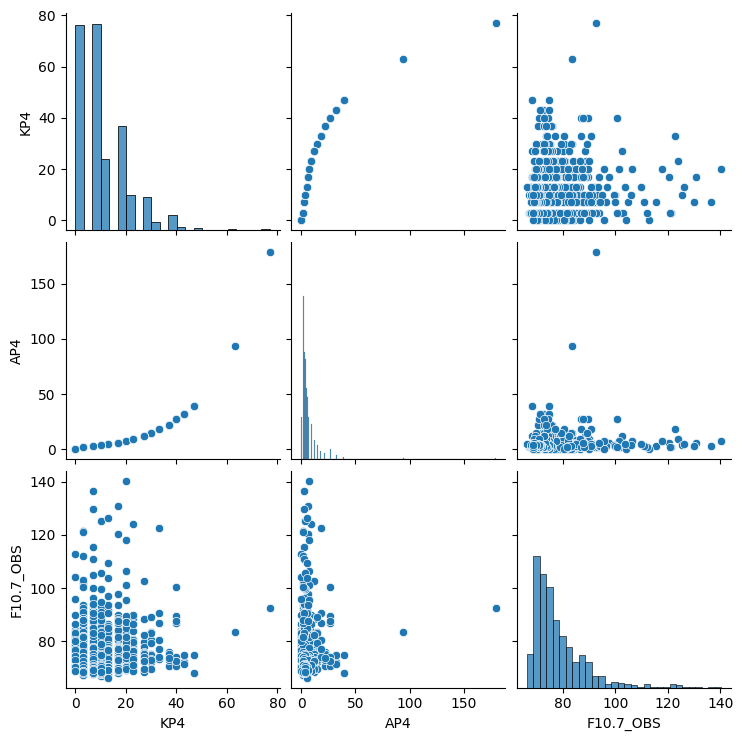

In [29]:
# sns.pairplot(left_mergedID[left_mergedID.columns.difference(['srp', 'smaDerivative', 'eccDerivative', 'firstEcc', 'secEcc', 'incDot', 'firstIncDeriv', 'secIncDeriv', 'eccLongitudeDot', 'meanLongitudeDot', 'trueLongitudeDot'])])
# plt.show()
import seaborn as sns

pp = sns.pairplot(data=left_mergedID,
                  y_vars=['KP4', "AP4", "F10.7_OBS"],
                  x_vars=['KP4', "AP4", "F10.7_OBS"]).savefig("pairplot.pdf")

In [ ]:
#Apenas para 1 satelite, ver se existe correlacao entre drag e arg perigeu
import seaborn as sns

#covariancia drag vs perigeu e perceber a zona de maior variancia
# plt.plot(left_mergedID.arg_perigee, 'o')
# plt.plot(left_mergedID.epochSince, left_mergedID.arg_perigee)
filteredDataID = left_mergedID[left_mergedID.drag < 100]
# plt.scatter(filteredData.drag, filteredData.arg_perigee, s=1)

#nao parece que o drag varie muito com o argumento do perigeu. Covariancia drag com perigeu para 1 satelite
sns.regplot(x=filteredDataID.drag, y=filteredDataID.arg_perigee, scatter_kws={"s": 1})
plt.show()


In [ ]:
# for all sattelites together, for each timestep, calculate the variance of the drag (1 value per day)
# plot this compared to the perigee (1 value per day)
allFilesOrbitalUnpickledWDate = allFilesOrbitalUnpickled.copy()
allFilesOrbitalUnpickledWDate["epochSinceDate"] = allFilesOrbitalUnpickledWDate["epochSince"].apply(lambda x: datetime.datetime(2000, 1, 1, 12, 0) +  datetime.timedelta(seconds=x))
allFilesOrbitalUnpickledWDate["epochSinceDate"] = allFilesOrbitalUnpickledWDate["epochSinceDate"].apply(lambda x: x.strftime("%Y-%m-%d"))


#quando o arg perigee X => variance drag Y (data nao interessa, queremos agrupar os argumentos do perigeu semelhantes e ver a variancia do drag)
#group Arg perigee by 0.1 and calculate the drag variance for each group
allFilesOrbitalUnpickledWDate["arg_perigeeGroup"] = allFilesOrbitalUnpickledWDate["arg_perigee"].apply(lambda x: round(x, 1))
allFilesOrbitalUnpickledWDate = allFilesOrbitalUnpickledWDate.groupby(by=['arg_perigeeGroup']).agg({'drag': ['var']})
allFilesOrbitalUnpickledWDate.reset_index(inplace=True)
allFilesOrbitalUnpickledWDate.columns = ['arg_perigeeGroup', 'dragVar']
allFilesOrbitalUnpickledWDate
plt.plot(allFilesOrbitalUnpickledWDate.arg_perigeeGroup, allFilesOrbitalUnpickledWDate.dragVar, 'o')
# allFilesOrbitalUnpickledWDate
# EM MÉDIA: Variancia do drag é maior quando arg perigee é -6 ou 6. Variancia maior quando arg perigee é 0


In [ ]:
# Ver variacao do Raan com o angulo do satélite (porque quando o satelite está no plano do equador (qd a inclinacao é 0) ele é mais afetado pela forma achatada da terra mas quando tem uma orbita inclinada ele é menos afetado pela oblateness
# Uma das perturbacoes que acontece neste caso é que o plano da órbita roda (por isso é que o raan vai ter uma variacao linear ao longo do tempo).
allFilesOrbitalUnpickledIncRaan = allFilesOrbitalUnpickled.copy()

#filter by inclination
# allFilesOrbitalUnpickledIncRaan = allFilesOrbitalUnpickledIncRaan[allFilesOrbitalUnpickledIncRaan.inc.any() <= 2 and allFilesOrbitalUnpickledIncRaan.inc >= 1.6]
allFilesOrbitalUnpickledIncRaan = allFilesOrbitalUnpickledIncRaan[allFilesOrbitalUnpickledIncRaan.inc < 1]

allFilesOrbitalUnpickledIncRaan["incGroup"] = allFilesOrbitalUnpickledIncRaan["inc"].apply(lambda x: round(x, 7))
allFilesOrbitalUnpickledIncRaan = allFilesOrbitalUnpickledIncRaan.groupby(by=['incGroup']).agg({'raan': np.median})
allFilesOrbitalUnpickledIncRaan.reset_index(inplace=True)
allFilesOrbitalUnpickledIncRaan.columns = ['incGroup', 'raanMean']
allFilesOrbitalUnpickledIncRaan
plt.plot(allFilesOrbitalUnpickledIncRaan.incGroup, allFilesOrbitalUnpickledIncRaan.raanMean, 'o')

#Quando a raan é aprox 1.5 rads (90 graus), a inclinacao é mais afetado pela oblateness da terra por passar nas zonas mais achatadas da terra. 
# Quando a raan é 0, o inclinacao é menos afetado pela oblateness da terra por passar nas zonas mais esfericas da terra. 
#Queria provar o contrario mas nao tenho dados de orbitas com inc = 0

In [ ]:
# Ver variacao do Raan com o angulo do satélite (porque quando o satelite está no plano do equador (qd a inclinacao é 0) ele é mais afetado pela forma achatada da terra mas quando tem uma orbita inclinada ele é menos afetado pela oblateness
# Uma das perturbacoes que acontece neste caso é que o plano da órbita roda (por isso é que o raan vai ter uma variacao linear ao longo do tempo).
allFilesOrbitalUnpickledIncRaanVar = allFilesOrbitalUnpickled.copy()

#filter by inclination
# allFilesOrbitalUnpickledIncRaan = allFilesOrbitalUnpickledIncRaan[allFilesOrbitalUnpickledIncRaan.inc.any() <= 2 and allFilesOrbitalUnpickledIncRaan.inc >= 1.6]
allFilesOrbitalUnpickledIncRaanVar = allFilesOrbitalUnpickledIncRaanVar[allFilesOrbitalUnpickledIncRaanVar.inc < 1]

allFilesOrbitalUnpickledIncRaanVar["incGroup"] = allFilesOrbitalUnpickledIncRaanVar["inc"].apply(lambda x: round(x, 7))
allFilesOrbitalUnpickledIncRaanVar = allFilesOrbitalUnpickledIncRaanVar.groupby(by=['incGroup']).agg({'raan': ["var"]})
allFilesOrbitalUnpickledIncRaanVar.reset_index(inplace=True)
allFilesOrbitalUnpickledIncRaanVar.columns = ['incGroup', 'raanVar']
allFilesOrbitalUnpickledIncRaanVar
plt.plot(allFilesOrbitalUnpickledIncRaanVar.incGroup, allFilesOrbitalUnpickledIncRaanVar.raanVar, 'o')

#Quando a raan é aprox 1.5 rads (90 graus), a inclinacao é mais afetado pela oblateness da terra por passar nas zonas mais achatadas da terra. 
# Quando a raan é 0, o inclinacao é menos afetado pela oblateness da terra por passar nas zonas mais esfericas da terra. 
#Queria provar o contrario mas nao tenho dados de orbitas com inc = 0

In [ ]:
allFilesOrbitalUnpickledDragSMA = allFilesOrbitalUnpickled.copy()

#à medida que o sma vai aumentando, o drag vai dimiunindo
#por outro lado, quando o sma é baixo, o drag é maior
#dividir por 1000 para ficar mais facil de ver (menos valores) e tirar a parte inteira
allFilesOrbitalUnpickledDragSMA["smaGroup"] = allFilesOrbitalUnpickledDragSMA["sma"].apply(lambda x:  math.trunc(x/1000))
allFilesOrbitalUnpickledDragSMA = allFilesOrbitalUnpickledDragSMA.groupby(by=['smaGroup']).agg({'drag': np.median})
allFilesOrbitalUnpickledDragSMA.reset_index(inplace=True)
allFilesOrbitalUnpickledDragSMA.columns = ['smaGroup', 'dragMean']
allFilesOrbitalUnpickledDragSMA
plt.plot(allFilesOrbitalUnpickledDragSMA.smaGroup, allFilesOrbitalUnpickledDragSMA.dragMean, 'o')
allFilesOrbitalUnpickledDragSMA.smaGroup


In [ ]:
#Calcular parametrios equinoctial manualmente
dataIDManualEquinoctial = newDataIDEquinoctial.copy()

#add columns to dataframe for eccentricity*sin(raan+arg_perigee)
dataIDManualEquinoctial["equinoctial_h"] = dataIDManualEquinoctial["ecc"] * np.sin(dataIDManualEquinoctial["raan"] + dataIDManualEquinoctial["arg_perigee"])
dataIDManualEquinoctial["equinoctial_k"] = dataIDManualEquinoctial["ecc"] * np.cos(dataIDManualEquinoctial["raan"] + dataIDManualEquinoctial["arg_perigee"])
dataIDManualEquinoctial["equinoctial_p"] = np.tan(dataIDManualEquinoctial["inc"]/2) * np.sin(dataIDManualEquinoctial["raan"])
dataIDManualEquinoctial["equinoctial_q"] = np.tan(dataIDManualEquinoctial["inc"]/2) * np.cos(dataIDManualEquinoctial["raan"])

In [ ]:
sns.pairplot(dataIDManualEquinoctial[dataIDManualEquinoctial.columns.difference(['srp', 'smaDerivative', 'eccDerivative', 'firstEcc', 'secEcc', 'incDot', 'firstIncDeriv', 'secIncDeriv', 'eccLongitudeDot', 'meanLongitudeDot', 'trueLongitudeDot'])])
plt.show()